In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)

In [27]:
data = pd.read_csv("Stock_Price.csv", parse_dates=['Date'], index_col='Date')
df_resam = data.resample('D').mean()
df = df_resam.bfill()
df.shape

(6375, 6)

In [28]:
def prepare_dataset(data, size):
  x_data = []
  y_data = []

  l = len(data) - size

  for i in range(l):
    x = data[i:i+size]
    y = data[i+size]
    x_data.append(x)
    y_data.append(y)

  return np.array(x_data), np.array(y_data)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
scaled_data = scaler.fit_transform(dataset)
len(data.Close.values)

6375

In [30]:
train_size = int(np.ceil(len(scaled_data) * 0.8))
train_size

5100

In [37]:
xtrain, ytrain = prepare_dataset(scaled_data[:train_size], 50)
xtest, ytest = prepare_dataset(scaled_data[train_size-50:], 50)


In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

r = model.fit(xtrain, ytrain, epochs = 1, batch_size = 1)

5050/5050 [==============================] - 101s 19ms/step - loss: 1.7829e-04


In [39]:
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
rmse

82.3194775330146

In [35]:
print(len(scaled_data) - train_size, len(predictions)) 

1275 1225


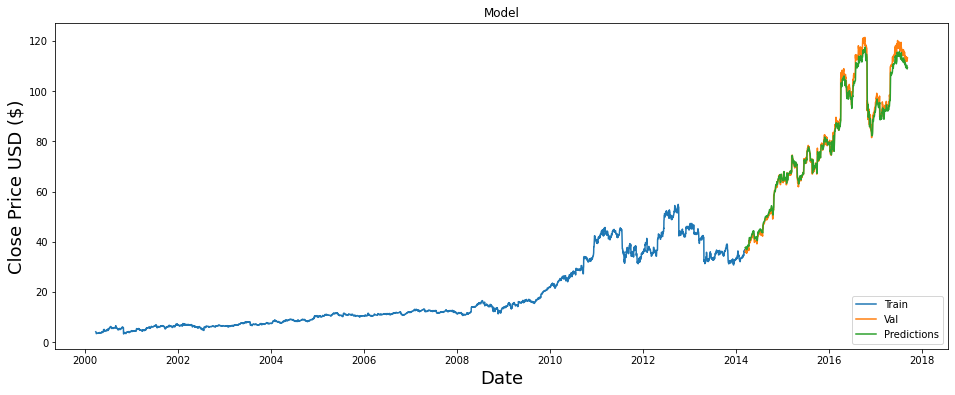

In [40]:
data_plot = df.filter(['Close'])

# Plot the data
train = data_plot[:train_size]
valid = data_plot[train_size:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(data_predict['Prediction'])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()